In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster



In [18]:
np.random.seed(42)
glass_data = fetch_ucirepo(id=42)

In [19]:
#Taking the data
X = glass_data.data.features
y = glass_data.data.targets

df = pd.DataFrame(X, columns=glass_data.feature_names)

In [20]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [21]:
y

,Type_of_glass
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [22]:
#Checking if the dataset contains incomplete data
df.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [23]:
df.shape

(214, 9)

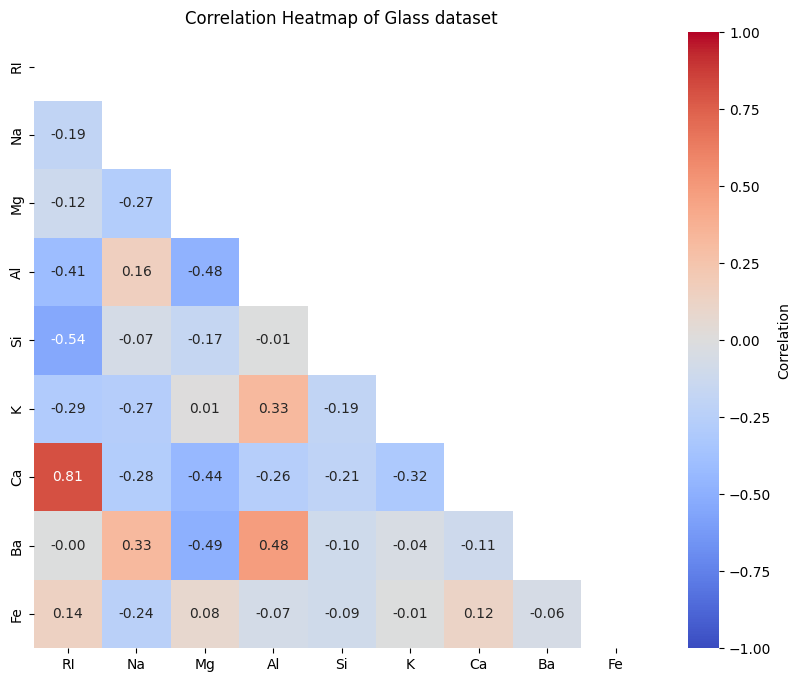

In [24]:
corr_matrix = X.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-1, vmax=1, square=True, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap of Glass dataset')
plt.show()

In [25]:
#Scaling the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=glass_data.feature_names)
X_scaled

,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [27]:
#Analyzing the dendogram
Z = linkage(X_scaled, method='ward')

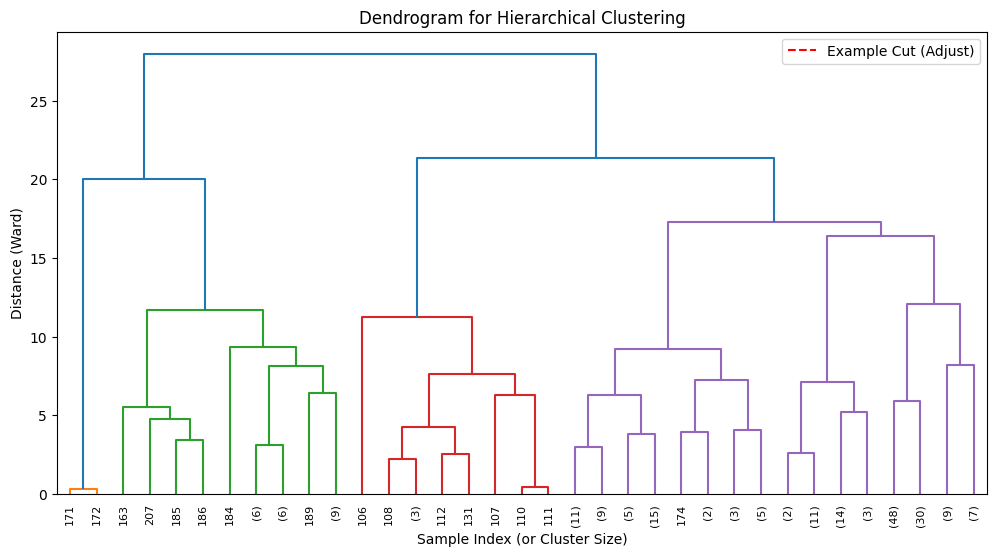

In [28]:
# Plotting the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=8)
plt.xlabel('Sample Index (or Cluster Size)')
plt.ylabel('Distance (Ward)')
plt.title('Dendrogram for Hierarchical Clustering')
plt.axhline(y=50, color='r', linestyle='--', label='Example Cut (Adjust)') 
plt.legend()
plt.show()

Silhouette Score for k=2: 0.450
Silhouette Score for k=3: 0.452
Silhouette Score for k=4: 0.452
Silhouette Score for k=5: 0.259
Silhouette Score for k=6: 0.282
Silhouette Score for k=7: 0.294
Silhouette Score for k=8: 0.306
Silhouette Score for k=9: 0.310
Silhouette Score for k=10: 0.314


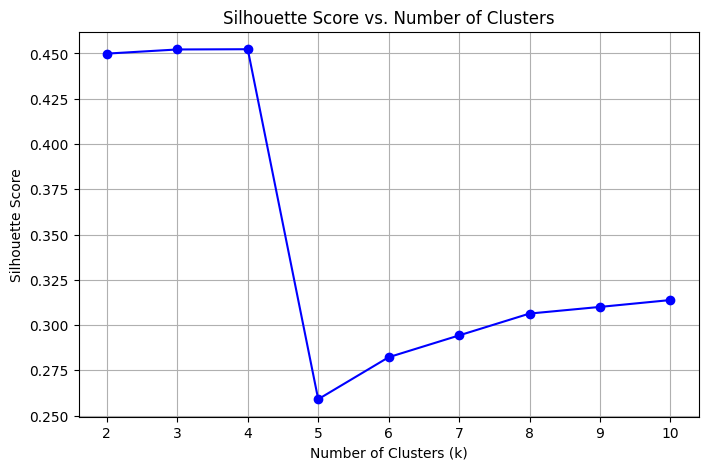

In [ ]:
#Silhouette Score for Range of k
silhouette_scores = []
k_range = range(2, 11)  # Test k=2 to 10

for k in k_range:
    # Cut hierarchy at k clusters
    clusters = fcluster(Z, k, criterion='maxclust')
    score = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.3f}")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()


In [ ]:
# Optimal k (highest silhouette score)
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal k based on silhouette score: {optimal_k}")

#Distance Threshold
# Cut dendrogram at a specific distance (e.g., 50)
distance_threshold = 50  # Adjust based on dendrogram
clusters_threshold = fcluster(Z, distance_threshold, criterion='distance')
n_clusters_threshold = len(np.unique(clusters_threshold))
print(f"Number of clusters at distance {distance_threshold}: {n_clusters_threshold}")

Optimal k based on silhouette score: 4
Number of clusters at distance 50: 1


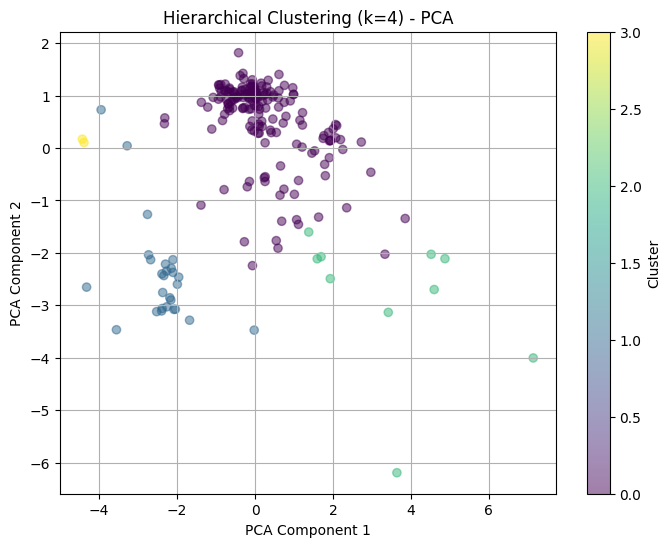

In [ ]:
#Visualize Clusters with Optimal k (PCA)
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
clusters = hierarchical.fit_predict(X_scaled)

# Reduce to 2D with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Hierarchical Clustering (k={optimal_k}) - PCA')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()